<a href="https://colab.research.google.com/github/K0SATIN/Data-analyst-home-task/blob/main/SARIMA_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка библиотек**

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Подключение библиотек**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm_arima
from pmdarima.arima.auto import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
HospitalityEmployees = pd.read_csv("/content/HospitalityEmployees.csv", index_col=['Date'],
                                   parse_dates=['Date'], dayfirst=False)
HospitalityEmployees.head(20)

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
1990-06-01,1123.5
1990-07-01,1134.2
1990-08-01,1137.4
1990-09-01,1128.8


<Axes: xlabel='Date'>

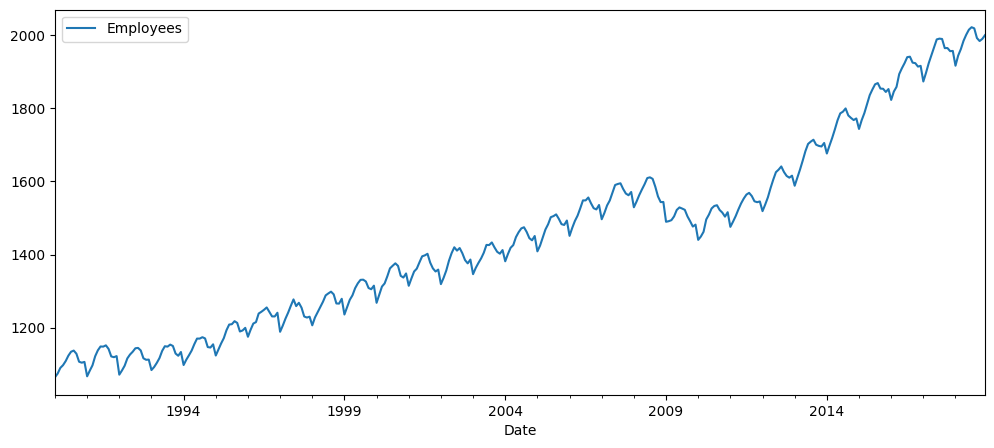

In [ ]:
HospitalityEmployees.plot(figsize=(12,5))

[Text(0, 0.5, 'Thousands of persons')]

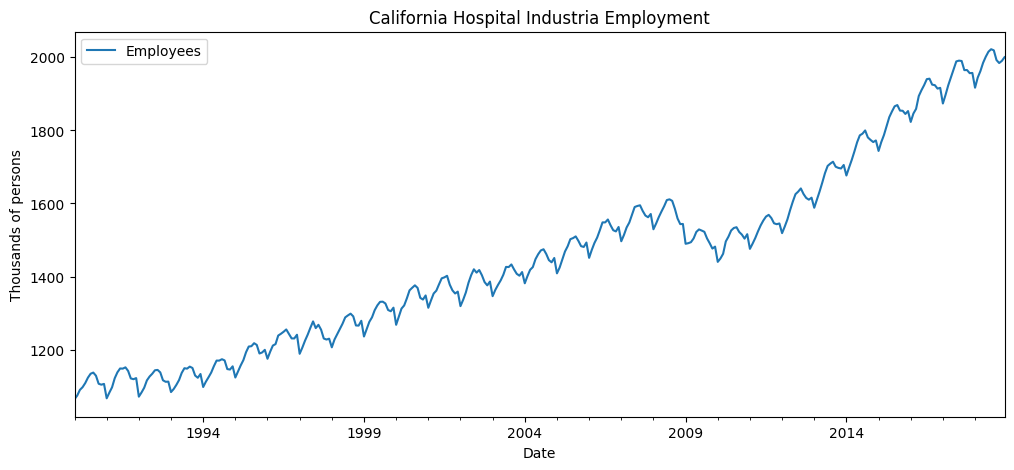

In [ ]:
_ylabel = 'Thousands of persons' # да, только транзитом через переменные - иначе будет ошибка
_title = "California Hospital Industria Employment"
HE = HospitalityEmployees.plot(figsize=(12,5), title = _title)
HE.set(ylabel = _ylabel) # а если по-другому тут то просто не выведется

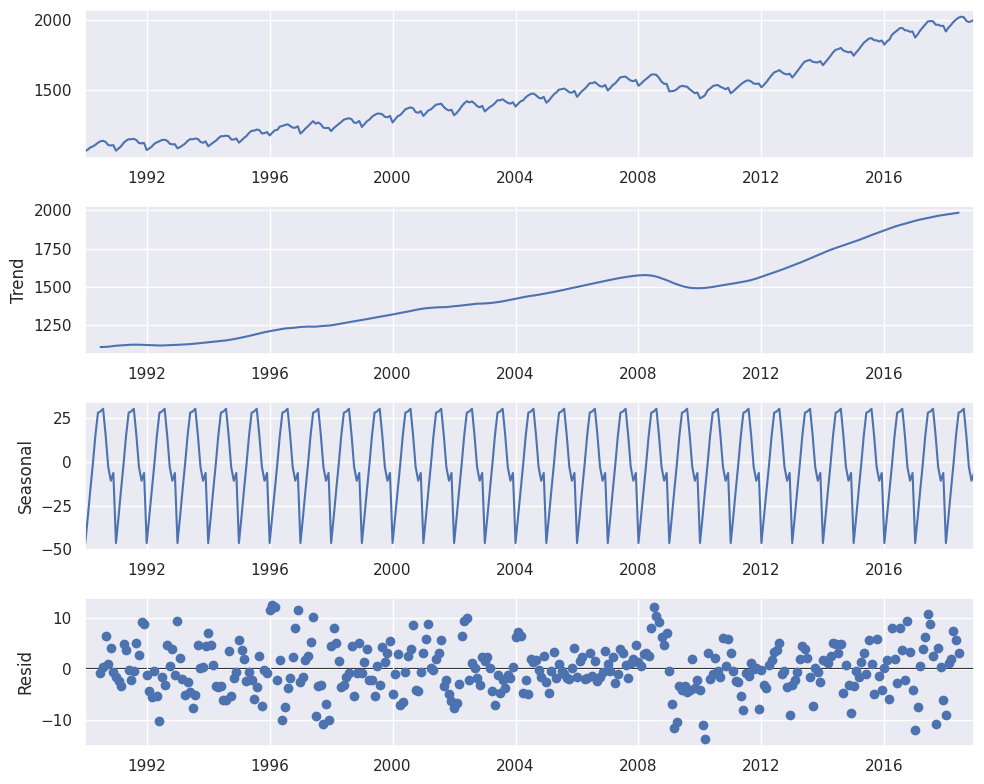

In [ ]:
sb.set(rc={'figure.figsize':(10, 8)}) # я могу убрать эту строчку чтоб всё было прям как в образце
# но так типа красивнее
result = seasonal_decompose(HospitalityEmployees, model='additive')
result.plot()
plt.show()

In [ ]:
auto_arima(HospitalityEmployees["Employees"], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 02 Apr 2023   AIC                           2208.504
Time:                                      17:31:08   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.508      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.510      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.150      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    702.589      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.332      0.000      -0.834      -0.664
sigma2        29.2994      1.717     17.060      0.000      25.933      32.666
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = HospitalityEmployees.iloc[:len(HospitalityEmployees) - 12]
test = HospitalityEmployees.iloc[len(train):]
len(train), len(test)

(336, 12)

In [ ]:
model = SARIMAX(train["Employees"], order = (1, 1, 2), seasonal_order=(1, 0, 1, 12))
result = model.fit()
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 02 Apr 2023   AIC                           2128.116
Time:                                      17:31:18   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.242      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.652      0.000      -1.096      -0.821
ma.L2          0.1497      0.061      2.452      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    729.357      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.143      0.000      -0.838      -0.666
sigma2        28.7654      1.684     17.079      0.000      25.464      32.066
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.34
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

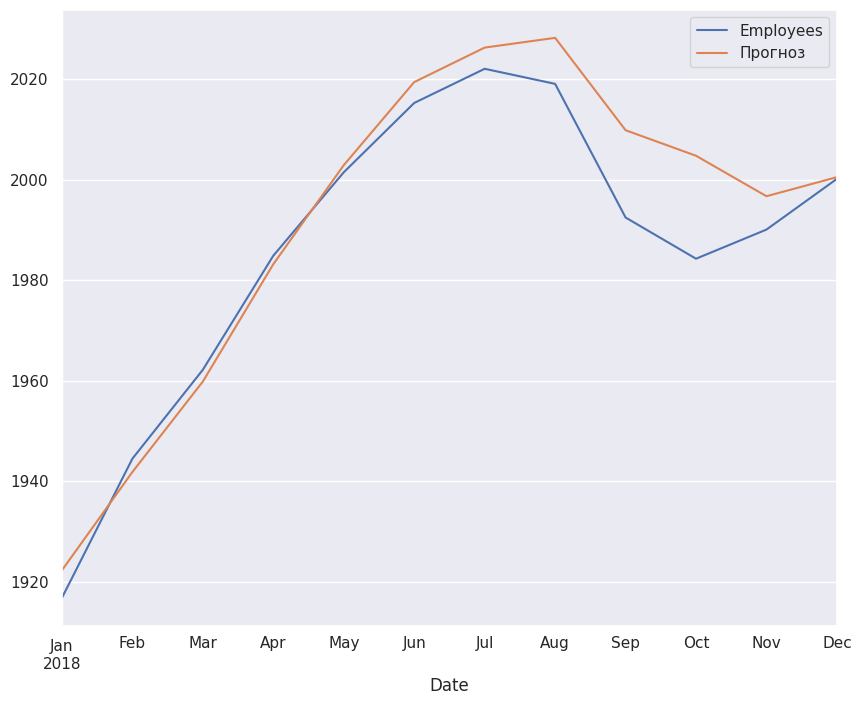

In [ ]:
predications = result.predict(
    start = len(train), end = len(HospitalityEmployees)-1, dynamic=False, typ = "levels").rename("Прогноз")
test["Employees"].plot(legend = True)
predications.plot(legend = True)


In [ ]:
mse_value = mean_squared_error(test["Employees"], predications)
rmse_value = rmse(test["Employees"], predications)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.69121473
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.814262007


In [ ]:
full_model = SARIMAX(HospitalityEmployees["Employees"], order = (1, 1, 2), seasonal_order=(1, 0, 1, 12))
result = full_model.fit()
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 02 Apr 2023   AIC                           2208.504
Time:                                      20:25:03   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.508      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.510      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.150      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    702.589      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.332      0.000      -0.834      -0.664
sigma2        29.2994      1.717     17.060      0.000      25.933      32.666
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

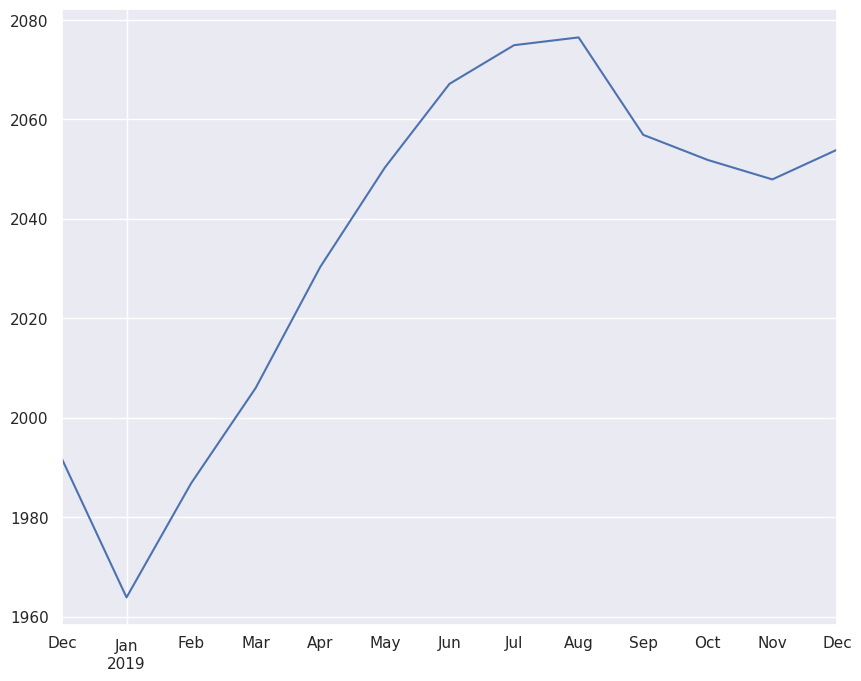

In [ ]:
prognoz_name = "Forecast SARIMAX(1, 1, 2)x(1, 0, [1], 12)"
new_predications = result.predict(
    start = len(HospitalityEmployees)-1, end = len(HospitalityEmployees)+11, dynamic=False, typ = "levels").rename(prognoz_name)
new_predications.plot(legend = False)


<Axes: title={'center': 'Исходные данные'}, xlabel='Date'>

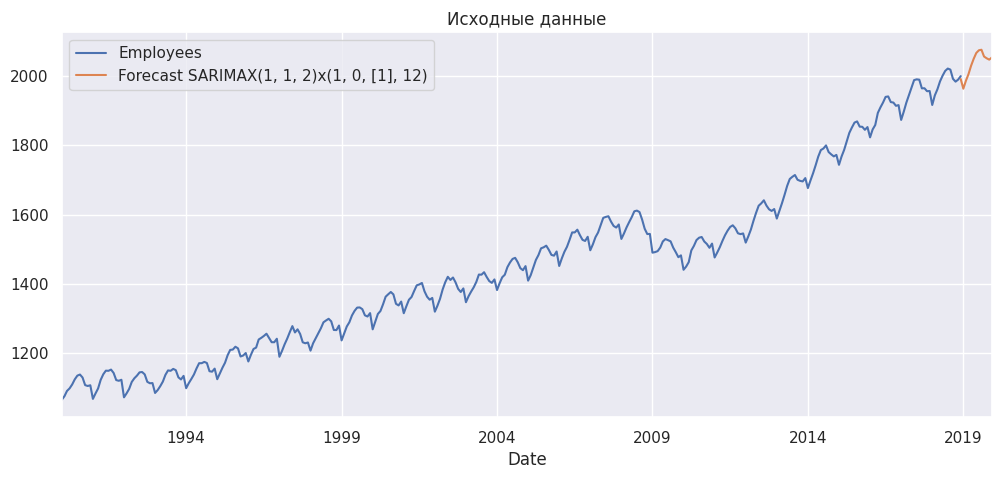

In [ ]:
HospitalityEmployees.plot(figsize=(12,5), title = _title)
new_predications.plot(legend = True)